In [ ]:
![image.png](attachment:image.png)

# Data Science and AI
## Lab 4.1 Linear Regression

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

## Prediction of House Price Using Linear Regression
### Data
The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
%matplotlib inline

import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set_context('poster')
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')

### 1. Explore Data
Perform EDA on this dataset. Use what you have learned so far.

In [3]:
# Read CSV
data = pd.read_csv('data/Sacramento_transactions.csv')

In [4]:
data.shape

(985, 12)

In [5]:
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [7]:
# Check Null Values
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [9]:
# Zip is categorical value, should be string
data['zip'] = data['zip'].astype(str)

In [10]:
# Describe Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


**Note**: Got min value 0 for beds, baths, sqft which does not seem correct.

In [11]:
filter = data['beds'] == 0
print('Number of cases with beds equal to zero: ', data[filter].shape[0])
data[filter].sample(5)

Number of cases with beds equal to zero:  108


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
324,201 FIRESTONE DR,ROSEVILLE,95678,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,500500,38.770153,-121.300039
570,96 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886024,-121.289859
265,230 BANKSIDE WAY,SACRAMENTO,95835,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,270000,38.676937,-121.529244
862,2065 IMPRESSIONIST WAY,EL DORADO HILLS,95762,CA,0,0,0,Residential,Fri May 16 00:00:00 EDT 2008,680000,38.682961,-121.033253
236,2340 HURLEY WAY,SACRAMENTO,95825,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,225000,38.588816,-121.408549


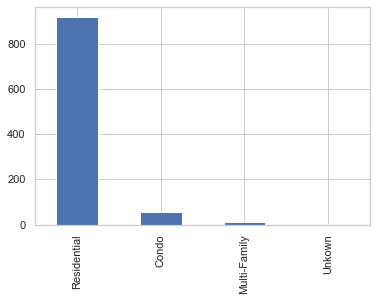

In [12]:
# Types of Data
data['type'].value_counts().plot(kind='bar')
plt.show()

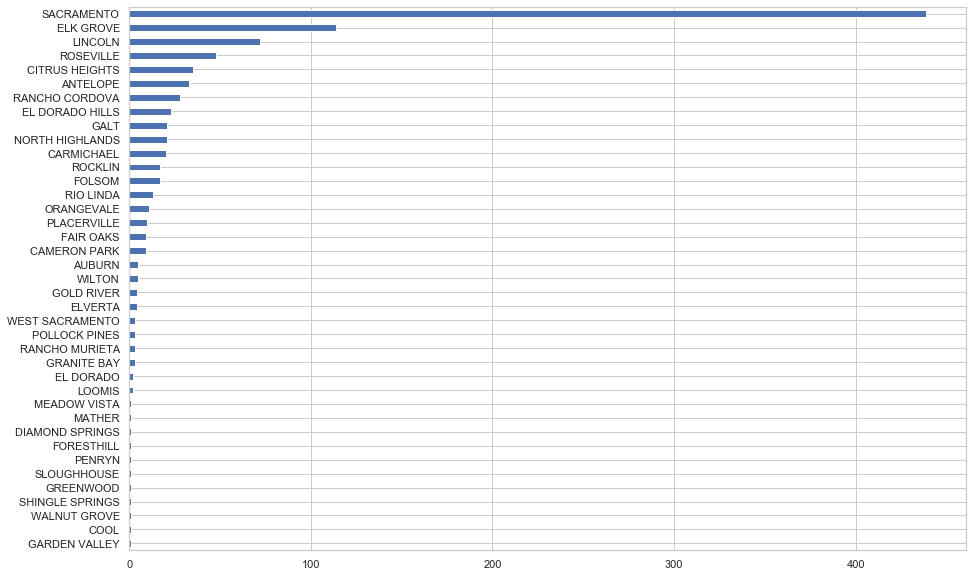

In [13]:
# City
data['city'].value_counts().sort_values().plot(
    kind='barh', figsize=(15, 10))
plt.show()

### Create another type which have 0 beds, baths, sqft

In [14]:
data.loc[data['beds'] == 0, 'type'] = 'Plot'

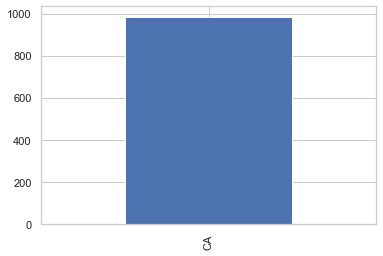

In [15]:
data['state'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(
    location=[38.575764, -121.478851],
    tiles='Mapbox Bright',
    zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'],
                  data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

### 2. Predict Price
We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?
> **Answer**: Price is target variable. Based on other predictor variables we'll predict price.

#### 2.2 List all possible variables which might be Predictor variable.

> **Answer**:
- beds
- baths
- sqft
- type

In [17]:
# Predictor Variable
X = data['beds']

In [18]:
# Target Variable
y = data['price']

In [19]:
def draw_scatter_plot(X, y):
    # Plot the data
    # create a figure
    fig = plt.figure(figsize=(15, 7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, y, c='b')

    plt.show();

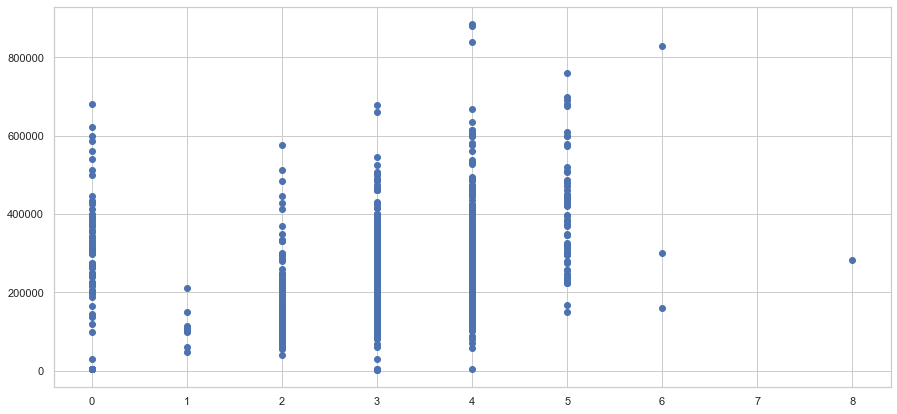

In [20]:
# beds
draw_scatter_plot(data['beds'], data['price'])

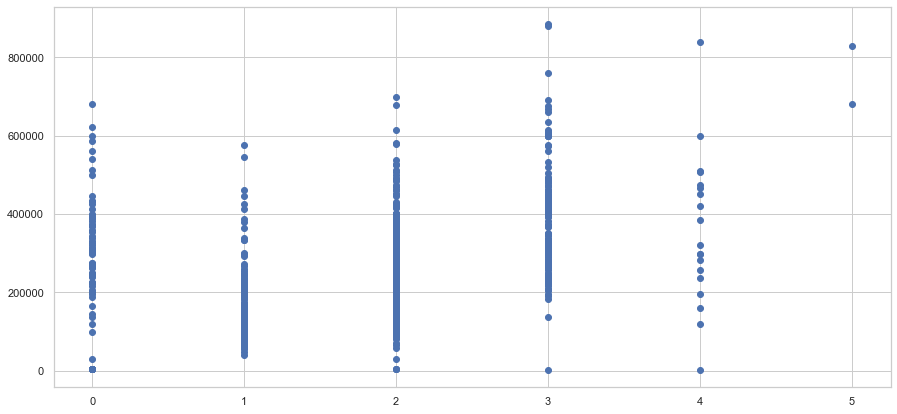

In [21]:
# beds
draw_scatter_plot(data['baths'], data['price'])

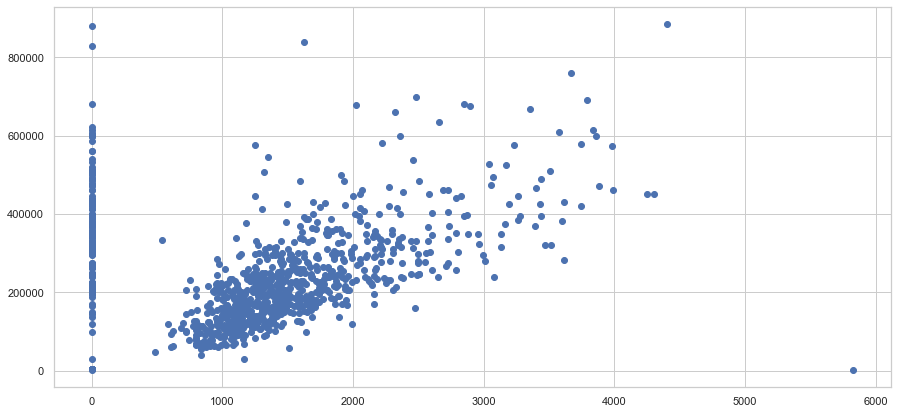

In [22]:
# beds
draw_scatter_plot(data['sq__ft'], data['price'])

#### 2.3 Find correlation between variables
Find correlation between variables. Which is the best predictor? Why? State your reason.

In [23]:
# ANSWER
data.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


- `sq__ft` is the best predictor
- `sq__ft` got stong relationship with beds, baths

#### 2.4 What is the simplest way to predict price
So we have information for 985 houses. What is the easiest way to predict price of a house?

In [24]:
# ANSWER
# Mean of Price
data['y_hat'] = data['price'].mean()

In [25]:
X = data['sq__ft']
y = data['price']
y_hat = data['y_hat']

In [26]:
def draw_plot(X, y, Yhat):
    # Plot the data
    # create a figure
    fig = plt.figure(figsize=(15, 7))
    # get the axis of that figure
    ax = plt.gca()

    # plot a scatter plot on it with our data
    ax.scatter(X, y, c='b')
    ax.plot(X, Yhat, color='r')

    plt.show()

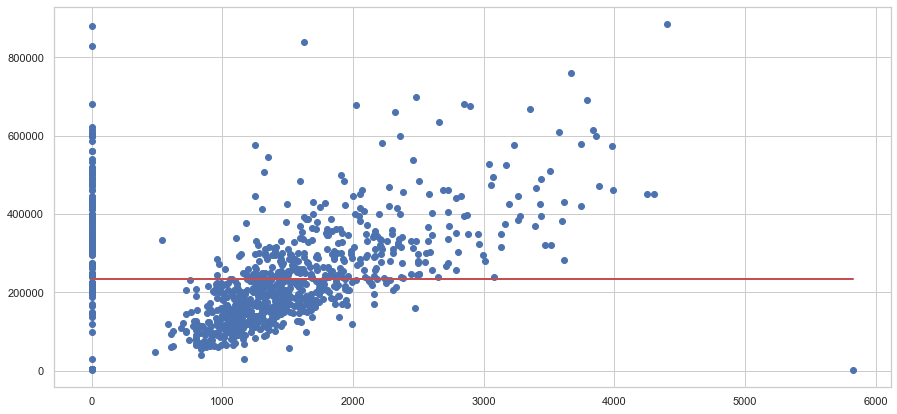

In [27]:
draw_plot(X, y, y_hat)

#### 2. 5 Find Resudals
Find difference between actual value and predicted value. Use absolute value.

In [28]:
# ANSWER
res = abs(data['price'] - data['y_hat']).mean()
res

103452.16956891476

#### 2.6  Predict Using Linear Regression
[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

$$\hat{y} = \beta_0 + \beta_1 x$$

$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$
- $s_Y$ : the sample standard deviation of observed values $Y$
- $s_X$ : the sample standard deviation of observed values $X$
- $r_{XY}$ : the sample Pearson correlation coefficient between observed $X$ and $Y$

#### 2.7 Define X, Y
- X = Predictor Variable 
- y = Target Variable

In [30]:
X = data['sq__ft']
y = data['price']

#### 2.7.A Calculate beta_1
$$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [31]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y - Ybar) * (X - Xbar)) 
    d = np.sum(np.square(X - Xbar)) 
    
    beta_1 = n/d
    
    return beta_1

In [32]:
beta_1 = calculate_beta_1(X, y)
beta_1

54.158639688530755

#### 2.7.B Calculate beta_0
$$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [33]:
# ANSWER
def calculate_beta_0(X, Y):
    
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar
    
    return beta_0

In [34]:
beta_0 = calculate_beta_0(X, y)
beta_0

162930.16140699777

#### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)
$$\hat{y} = \beta_0 + \beta_1 x$$

In [35]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [36]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat.sample(10)

871    209723.226098
920    228028.846313
122    266589.797771
235    236585.911383
758    246496.942446
292    192121.668199
17     205986.279959
490    230520.143738
506    260957.299243
107    325893.508230
Name: sq__ft, dtype: float64

#### 2.7.D Find Residuals
$$ \text{residual}_i = y_i - \hat{y}_i$$

In [37]:
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [38]:
resi = calculate_residual(y, Yhat)
resi.abs().sample(10)

840    106458.514569
624    123673.843368
785     75201.323726
332    362934.350039
282     65093.006447
626    104241.611203
132    189069.838593
983     18886.469282
18      74775.441544
270       719.675393
dtype: float64

#### 2.7.E Find R-Square
Write a function to calculate R-Square value.
The total sum of squares:
$$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

$$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [39]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [40]:
def calculate_residula_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [41]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residula_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [42]:
calculate_r_square(y, np.mean(y))

0.0

In [43]:
calculate_r_square(y, calculate_yhat(X, beta_0, beta_1))

0.11148717682951459

#### 2.7.F [BONUS] Draw Plot of Predicted Line

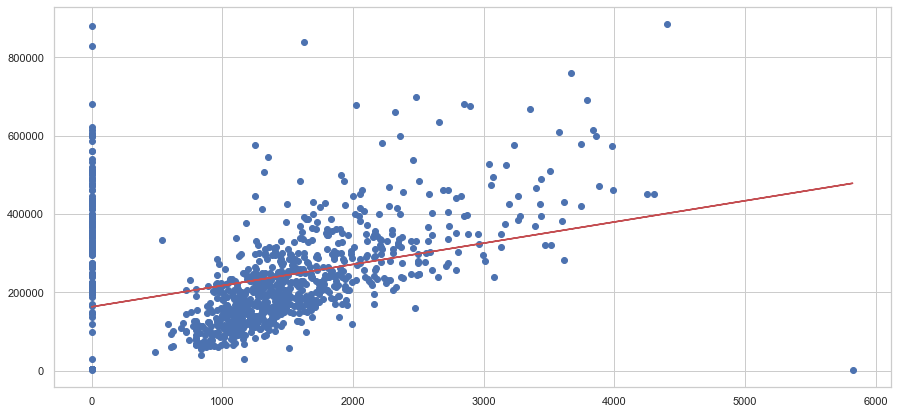

In [44]:
draw_plot(X, y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [45]:
data['Yhat'] = Yhat

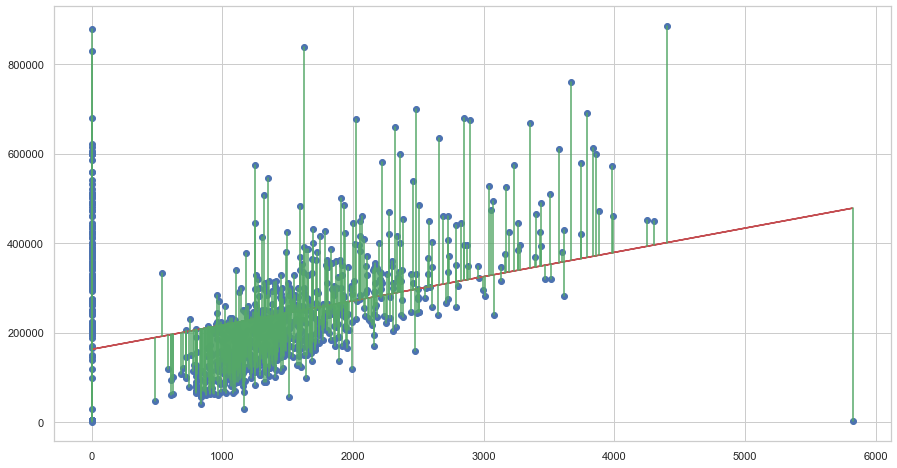

In [46]:
# create a figure
fig = plt.figure(figsize=(15, 7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in data.iterrows():
    plt.plot((row['sq__ft'],
              row['sq__ft']),
             (row['price'],
              row['Yhat']),
             'g-')

#### 2.8. Predict House Price
Let's assume we have information of following house:

- street: 1140 EDMONTON DR
- city:	SACRAMENTO
- zip: 95833
- state: CA
- beds:	3
- baths: 2
- sq__ft: 1204
- type:	Residential

**Predict the price of this house.**

In [47]:
# ANSWER
xpred = 1204
xpred

1204

In [48]:
beta_0

162930.16140699777

In [49]:
beta_1

54.158639688530755

In [50]:
Ypred = beta_1 * xpred + beta_0
Ypred

228137.1635919888

#### 2.9 Find Coefficient and Intercept using Linear Regression
Using `LinearRegression` of `sklearn.linear_model` package find Coefficient and Intercept.

In [52]:
# ANSWER

X = data[['sq__ft']]
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


#### 2.10 Find R Score
The coefficient $R^2$ is defined as $(1 - u/v)$, where $u$ is the residual sum of squares `((y_true - y_pred) ** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`. 

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [53]:
linreg.score(X, y)

0.11148717682951437

### 3. Splitting Data
#### 3.1 Create training and testing subsets
**Hint**: Using `train_test_split` method

In [54]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [55]:
# Check training/test data
# About training
print('About X_train')
print('- X_train info', '-' * 80)
print(X_train.info())
print('\n- X_train sample', '-' * 80)
print(X_train.sample(5))
print('=' * 100)
print('\nAbout y_train')
print('- y_train describe', '-' * 80)
print(y_train.describe())
print('\n- y_train sample', '-' * 80)
print(y_train.sample(5))

About X_train
- X_train info --------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 788 entries, 242 to 684
Data columns (total 1 columns):
sq__ft    788 non-null int64
dtypes: int64(1)
memory usage: 12.3 KB
None

- X_train sample --------------------------------------------------------------------------------
     sq__ft
882    1161
862       0
480    1928
82     1277
683    1386

About y_train
- y_train describe --------------------------------------------------------------------------------
count       788.000000
mean     236059.865482
std      141187.629749
min        2000.000000
25%      145000.000000
50%      215000.000000
75%      300000.000000
max      884790.000000
Name: price, dtype: float64

- y_train sample --------------------------------------------------------------------------------
78     223058
651    161600
17     116250
610     66500
287    315000
Name: price, dtype: int64


In [56]:
# Check training/test data
# About test
print('About X_test')
print('- X_test info', '-' * 80)
print(X_test.info())
print('\n- X_test sample', '-' * 80)
print(X_test.sample(5))
print('=' * 100)
print('\nAbout y_test')
print('- y_test describe', '-' * 80)
print(y_test.describe())
print('\n- y_test sample', '-' * 80)
print(y_test.sample(5))

About X_test
- X_test info --------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 74 to 200
Data columns (total 1 columns):
sq__ft    197 non-null int64
dtypes: int64(1)
memory usage: 3.1 KB
None

- X_test sample --------------------------------------------------------------------------------
     sq__ft
411    1436
247    1291
617     800
947       0
243    1315

About y_test
- y_test describe --------------------------------------------------------------------------------
count       197.000000
mean     226481.857868
std      126497.351487
min        1551.000000
25%      143500.000000
50%      207000.000000
75%      295000.000000
max      622500.000000
Name: price, dtype: float64

- y_test sample --------------------------------------------------------------------------------
765    285000
518    371086
433    217500
184    129000
13     107502
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score
1. Fit model using `X_train`, `y_train`
2. Find score using `x_test`, `y_test`

In [ ]:
# ANSWER

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

In [ ]:
linreg.score(X_test, y_test)

#### 3.4 Using your model predict price of a house
Let's assume we have house which have 1000 square feet. What is the predicted value of that house? Use your model.

In [57]:
# ANSWER
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1000

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  217088.8010955285


In [58]:
# ANSWER
x = [[1000]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  217088.8010955285
